# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [46]:
lat_lngs[0:10]

[(-39.19355221337735, -128.85056155097203),
 (86.3415665814222, 134.88745262436214),
 (-74.1835309847616, 2.6611507689244718),
 (-58.84580827129043, -91.60198048006652),
 (26.813303839381334, -10.32949964214518),
 (-10.497259816278358, -130.14146218779865),
 (-59.07172105320924, 30.44246689193693),
 (78.44850103680216, 27.43483118016991),
 (0.07539432825824122, 27.769214066637375),
 (48.506003599365044, 137.32788711955266)]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
city = cities[0]
city

'adamstown'

In [48]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -130.1015, 'lat': -25.066},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 72.21,
  'feels_like': 73.08,
  'temp_min': 72.21,
  'temp_max': 72.21,
  'pressure': 1021,
  'humidity': 84,
  'sea_level': 1021,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 11.9, 'deg': 90, 'gust': 14.41},
 'rain': {'1h': 0.23},
 'clouds': {'all': 99},
 'dt': 1701665289,
 'sys': {'country': 'PN', 'sunrise': 1701610952, 'sunset': 1701659893},
 'timezone': -28800,
 'id': 4030723,
 'name': 'Adamstown',
 'cod': 200}

In [49]:
city_lat = city_weather["coord"]["lat"]
# city_lat = city_weather.get("coord", {}).get("lat", None)

city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [50]:
{"City": city, 
  "Lat": city_lat, 
  "Lon": city_lng, 
  "Max Temp": city_max_temp,
  "Humidity": city_humidity,
  "Cloudiness": city_clouds,
  "Wind Speed": city_wind,
  "Country": city_country,
  "Date": city_date}

{'City': 'adamstown',
 'Lat': -25.066,
 'Lon': -130.1015,
 'Max Temp': 72.21,
 'Humidity': 84,
 'Cloudiness': 99,
 'Wind Speed': 11.9,
 'Country': 'PN',
 'Date': 1701665289}

In [51]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | smara
Processing Record 6 of Set 1 | taiohae
'coord'
City taiohae not found. Skipping...
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | hammerfest
Processing Record 9 of Set 1 | butembo
Processing Record 10 of Set 1 | amursk
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | palapye
Processing Record 13 of Set 1 | san antonio
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | yokadouma
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | waitangi
Processing Rec

Processing Record 33 of Set 4 | impfondo
Processing Record 34 of Set 4 | vilyuchinsk
Processing Record 35 of Set 4 | karachi
Processing Record 36 of Set 4 | fort bragg
Processing Record 37 of Set 4 | tsiombe
Processing Record 38 of Set 4 | labuan
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | mount darwin
Processing Record 41 of Set 4 | sibolga
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | amga
Processing Record 44 of Set 4 | mejit
Processing Record 45 of Set 4 | funafuti
Processing Record 46 of Set 4 | susuman
Processing Record 47 of Set 4 | chernyshevskiy
Processing Record 48 of Set 4 | crane
Processing Record 49 of Set 4 | nova sintra
Processing Record 0 of Set 5 | 'ohonua
'coord'
City 'ohonua not found. Skipping...
Processing Record 1 of Set 5 | acarau
Processing Record 2 of Set 5 | nadym
Processing Record 3 of Set 5 | asenovgrad
Processing Record 4 of Set 5 | winnemucca
Processing Record 5 of Set 5 | richards bay
Processing Record

Processing Record 25 of Set 8 | cumaribo
'coord'
City cumaribo not found. Skipping...
Processing Record 26 of Set 8 | sao felix do xingu
Processing Record 27 of Set 8 | ingeniero luis a. huergo
Processing Record 28 of Set 8 | camacupa
Processing Record 29 of Set 8 | igarka
Processing Record 30 of Set 8 | tamandare
Processing Record 31 of Set 8 | greymouth
Processing Record 32 of Set 8 | aq qayeh
'coord'
City aq qayeh not found. Skipping...
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | palangkaraya
Processing Record 36 of Set 8 | sao miguel do araguaia
Processing Record 37 of Set 8 | tandalti
Processing Record 38 of Set 8 | magadan
Processing Record 39 of Set 8 | qamdo
Processing Record 40 of Set 8 | renfrew
Processing Record 41 of Set 8 | charnay-les-macon
Processing Record 42 of Set 8 | happy valley-goose bay
Processing Record 43 of Set 8 | kill devil hills
Processing Record 44 of Set 8 | alotau
'coord'
City alotau

Processing Record 7 of Set 12 | guanica
Processing Record 8 of Set 12 | kimbe
Processing Record 9 of Set 12 | corner brook
Processing Record 10 of Set 12 | lobujya
Processing Record 11 of Set 12 | szczytno
Processing Record 12 of Set 12 | cidreira
Processing Record 13 of Set 12 | timbuktu
Processing Record 14 of Set 12 | zyrya
Processing Record 15 of Set 12 | alesund
Processing Record 16 of Set 12 | mahabe
'coord'
City mahabe not found. Skipping...
Processing Record 17 of Set 12 | cooper's town
Processing Record 18 of Set 12 | chukhloma
Processing Record 19 of Set 12 | sonsorol village
'coord'
City sonsorol village not found. Skipping...
Processing Record 20 of Set 12 | main beach
Processing Record 21 of Set 12 | nili
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | deir ez-zor
Processing Record 24 of Set 12 | sumy
Processing Record 25 of Set 12 | mar del plata
Processing Record 26 of Set 12 | nacala
Processing Record 27 of Set 12 | jumilla
Processing Record 28

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lon           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,72.21,84,99,11.90,PN,1701665289
1,tiksi,71.6872,128.8694,-23.69,99,99,7.40,PN,1701665303
2,edinburgh of the seven seas,-37.0676,-12.3116,58.32,86,1,12.68,PN,1701665305
3,puerto natales,-51.7236,-72.4875,41.95,92,86,7.70,PN,1701665306
4,smara,26.7384,-11.6719,56.14,84,2,3.20,PN,1701665135


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_ju.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_ju.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.21,84,99,11.90,PN,1701665289
1,tiksi,71.6872,128.8694,-23.69,99,99,7.40,PN,1701665303
2,edinburgh of the seven seas,-37.0676,-12.3116,58.32,86,1,12.68,PN,1701665305
3,puerto natales,-51.7236,-72.4875,41.95,92,86,7.70,PN,1701665306
4,smara,26.7384,-11.6719,56.14,84,2,3.20,PN,1701665135


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

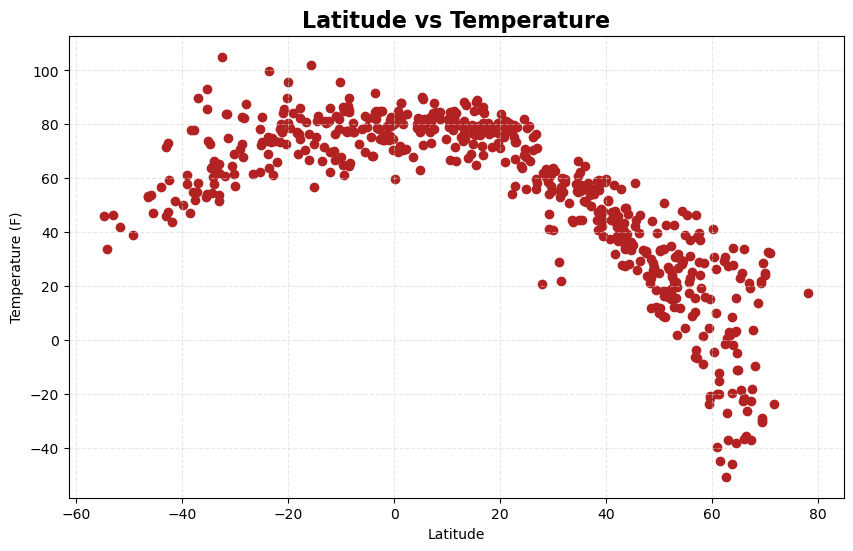

In [56]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig1_ju.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

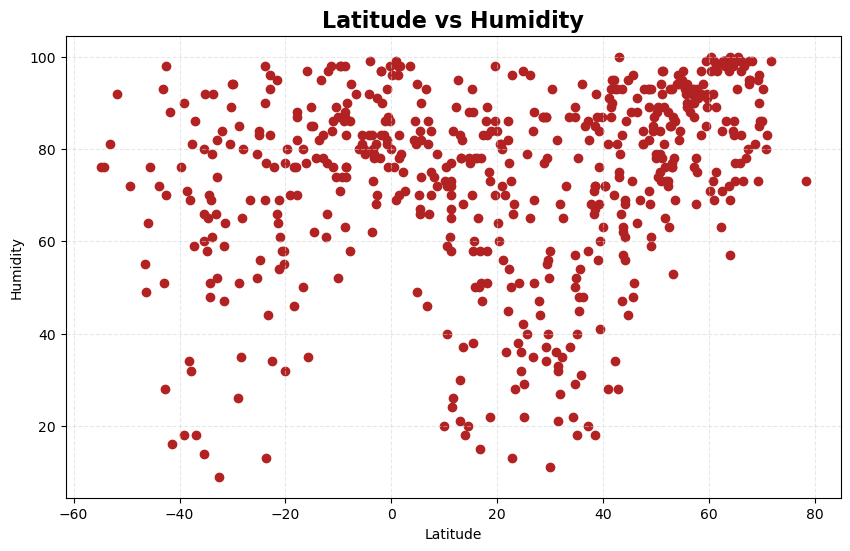

In [57]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig2_ju.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

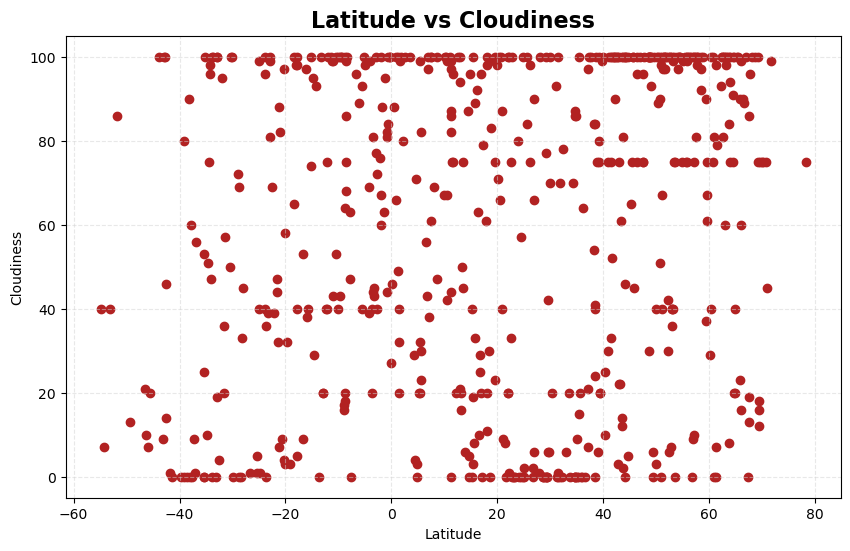

In [58]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig3_ju.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

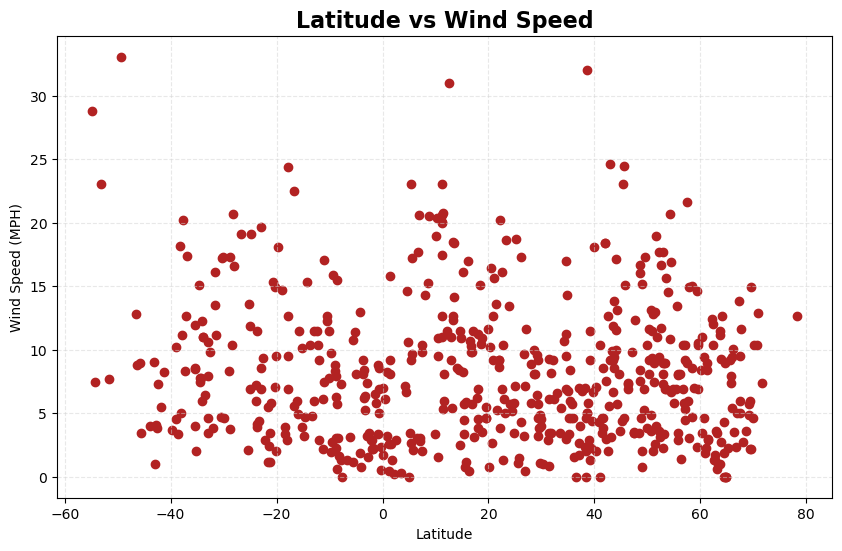

In [59]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig4_ju.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # make plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annot_loc, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,-23.69,99,99,7.40,PN,1701665303
4,smara,26.7384,-11.6719,56.14,84,2,3.20,PN,1701665135
6,hammerfest,70.6634,23.6821,32.45,80,75,10.36,PN,1701665312
7,butembo,0.1500,29.2833,59.70,96,46,1.68,PN,1701665313
8,amursk,50.2261,136.8994,11.98,88,100,11.61,PN,1701665314


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.21,84,99,11.90,PN,1701665289
2,edinburgh of the seven seas,-37.0676,-12.3116,58.32,86,1,12.68,PN,1701665305
3,puerto natales,-51.7236,-72.4875,41.95,92,86,7.70,PN,1701665306
5,port elizabeth,-33.9180,25.5701,65.32,79,0,11.01,PN,1701665310
9,papatowai,-46.5619,169.4708,52.92,55,21,12.84,PN,1701665315


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7748396416954723


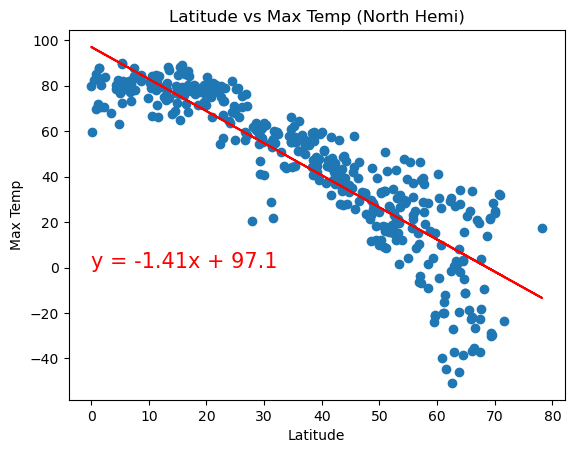

In [66]:
# Linear regression on Northern Hemisphere

# Print out the r-squared value along with the plot.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "North", (0, 0))

The r-squared is: 0.3590864256850778


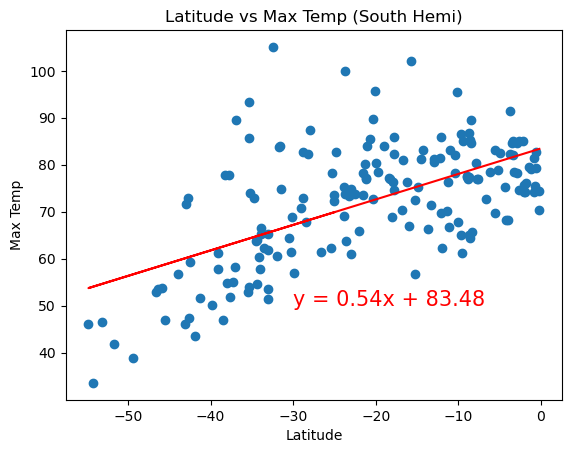

In [68]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "South", (-30, 50))

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12215910323272884


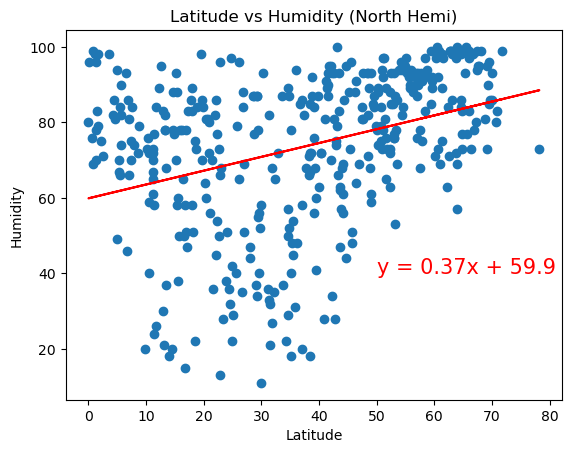

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "North", (50, 40))

The r-squared is: 0.12980581524139626


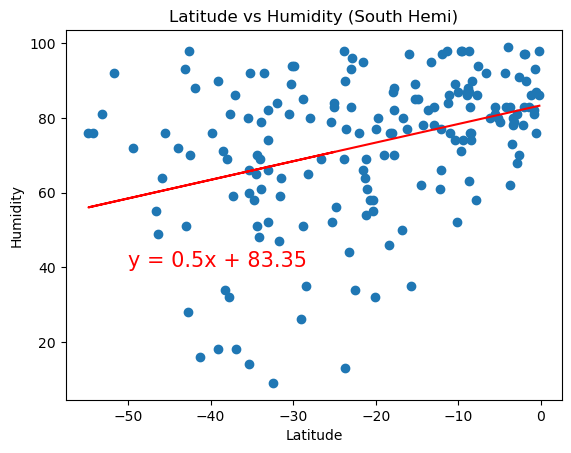

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "South", (-50, 40))

**Discussion about the linear relationship:It seems that latitude does not play a significant role in determining Humidity of our cities, exhibiting weak regression lines. Indeed, as we can scientifically surmise Humidity levels have more to do with proximity to large bodies of water, which explains why the y-axis intercept is higher in the Southern Hemisphere- the ratio of water to land is sigmificantly greater there.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03782142299911458


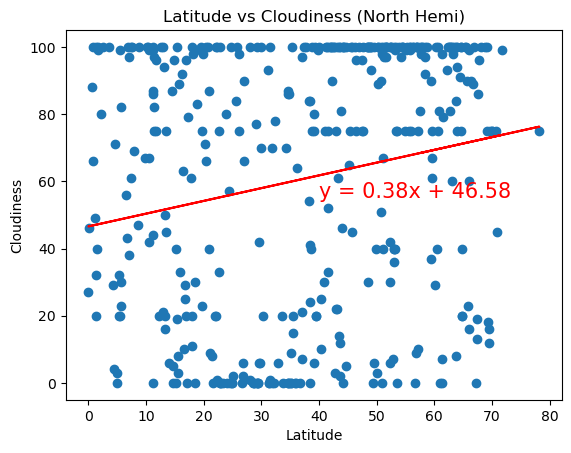

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "North", (40, 55))

The r-squared is: 0.11529561526008479


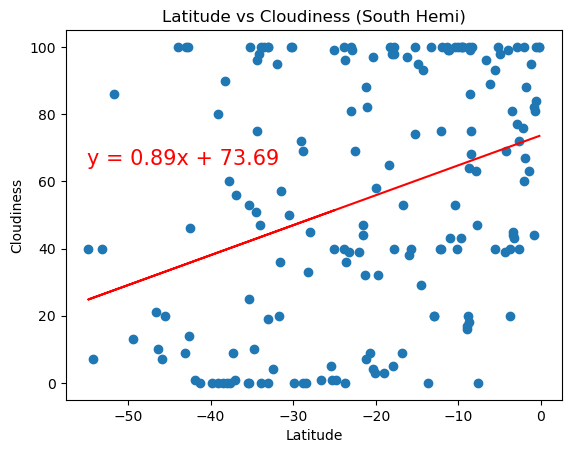

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "South", (-55, 65))

**Discussion about the linear relationship:These plots display the relationship of Cloudiness to Latitude, and like the previous plots the Southern Hemisphere has a strong linear relationship due again to the ratio of water to landmass being greater in the Southern Hemisphere than the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010872998057229364


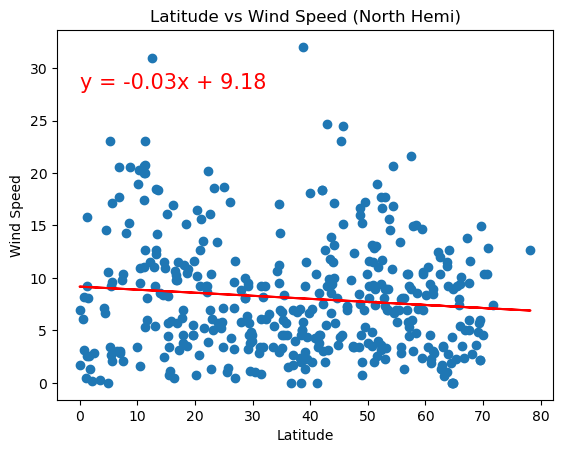

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "North", (0, 28))

The r-squared is: 0.10033517285829817


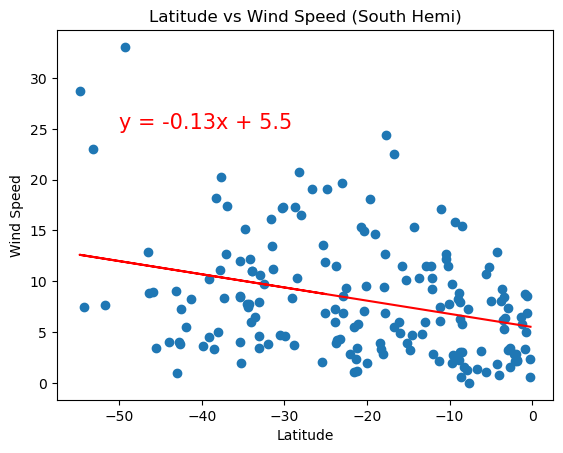

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "South", (-50, 25))

**Discussion about the linear relationship:The linear relationship in both the Northern Hemisphere and Southern Hemisphere is very weak in regards to the Wind Speed, and picks up slightly in the Southern Hemisphere where there is less landmass to block wind.